#### Importing necessary libraries

In [1]:
import os
import os.path
import glob
from pathlib import Path

import pandas as pd                                     
import numpy as np                                      
import matplotlib.pyplot as plt
import seaborn as sns

import cv2            
from PIL import Image
import datetime as dt
import tensorflow as tf  
import wget
import zipfile



#### Downloanding and unzipping ECG_dataset

In [2]:
url = "https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/gwbz3fsgp8-2.zip"
wget.download(url, 'C:/Users//MSI Apeche Pro/Desktop/Downloaded_images')

100% [..................................................] 203349349 / 203349349

'C:/Users//MSI Apeche Pro/Desktop/Downloaded_images/gwbz3fsgp8-2 (1).zip'

In [3]:
with zipfile.ZipFile('C:/Users//MSI Apeche Pro/Desktop/Downloaded_images\gwbz3fsgp8-2.zip', 'r') as zip_ref:
    zip_ref.extractall('F:/Unzip_ecg_image')

#### Loading & Reading ECG Images

Text(0.5, 1.0, 'MI')

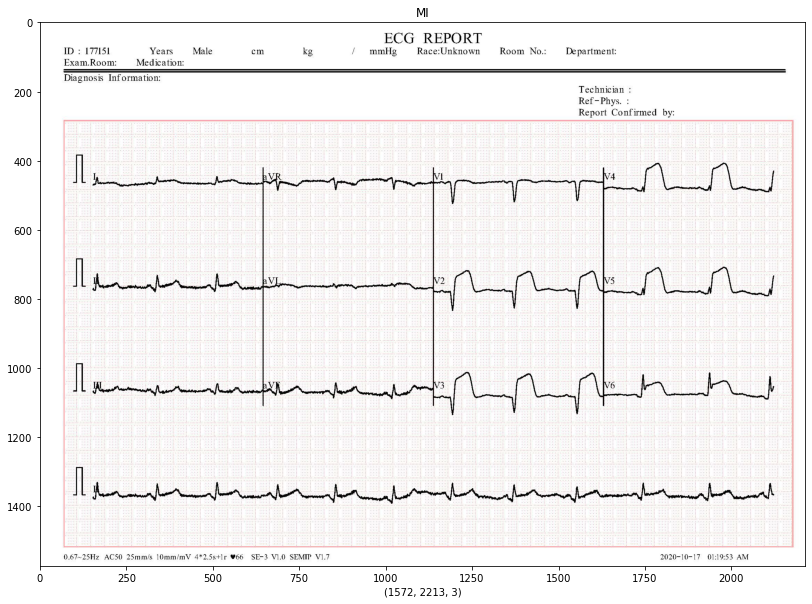

In [10]:
# MI patients data
ECG_MI_dir_ = Path('F:/Unzip_ecg_image/ECG Images of Myocardial Infarction Patients (240x12=2880)')

ECG_MI_filepaths = list(ECG_MI_dir_.glob(r'**/*.jpg'))
# Mapping the labels
MI_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_MI_filepaths))
# Paths & labels femalee eyes
ECG_MI_filepaths = pd.Series(ECG_MI_filepaths, name = 'File').astype(str)
MI_labels = pd.Series(MI_labels, name='Label')

# Concatenating...
MI_df = pd.concat([ECG_MI_filepaths, MI_labels], axis=1)
MI_df['Label'] = "MI"

#####################################################################

# HMI patients data
ECG_HMI_dir_ = Path('F:/Unzip_ecg_image/ECG Images of Patient that have History of MI (172x12=2064)')

ECG_HMI_filepaths = list(ECG_HMI_dir_.glob(r'**/*.jpg'))
# Mapping the labels
HMI_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_HMI_filepaths))
# Paths & labels femalee eyes
ECG_HMI_filepaths = pd.Series(ECG_HMI_filepaths, name = 'File').astype(str)
HMI_labels = pd.Series(HMI_labels, name='Label')

# Concatenating...
HMI_df = pd.concat([ECG_HMI_filepaths, HMI_labels], axis=1)
HMI_df['Label'] = "HMI"

#####################################################################

# AbnHB patients data
ECG_AbnHB_dir_ = Path('F:/Unzip_ecg_image/ECG Images of Patient that have abnormal heartbeat (233x12=2796)')

ECG_AbnHB_filepaths = list(ECG_HMI_dir_.glob(r'**/*.jpg'))
# Mapping the labels
AbnHB_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_AbnHB_filepaths))
# Paths & labels femalee eyes
ECG_AbnHB_filepaths = pd.Series(ECG_AbnHB_filepaths, name = 'File').astype(str)
AbnHB_labels = pd.Series(AbnHB_labels, name='Label')

# Concatenating...
AbnHB_df = pd.concat([ECG_AbnHB_filepaths, AbnHB_labels], axis=1)
AbnHB_df['Label'] = "ABNORMAL"

#####################################################################

# Normal patients data
ECG_Normal_dir_ = Path('F:/Unzip_ecg_image/Normal Person ECG Images (284x12=3408)')

ECG_Normal_filepaths = list(ECG_Normal_dir_.glob(r'**/*.jpg'))
# Mapping the labels
Normal_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_Normal_filepaths))
# Paths & labels femalee eyes
ECG_Normal_filepaths = pd.Series(ECG_Normal_filepaths, name = 'File').astype(str)
Normal_labels = pd.Series(Normal_labels, name='Label')

# Concatenating...
Normal_df = pd.concat([ECG_Normal_filepaths, Normal_labels], axis=1)
Normal_df['Label'] = "NORMAL"

# Image Example of MI
figure = plt.figure(figsize=(20,10))
x = plt.imread(MI_df["File"][10])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(MI_df["Label"][10])


#### Concatenation and converting of dataframes

In [8]:
#result = pd.concat([list of DataFrames], axis=0, join='outer', ignore_index=False)
df_ECG = pd.concat([MI_df, HMI_df, AbnHB_df,Normal_df],ignore_index=True)

#convert dataframe to numpy array
arr = df_ECG.to_numpy()


#### Cropping of the ECG images

In [9]:
def im_crop(image,left=71.5, top= 287.5, right=2102, bottom= 1228):
    img= Image.open(image) 
    img_out = img.crop((left, top, right, bottom))
    
    return img_out

In [14]:
image_no = 1
ECG_label=[]
for i in range (len(arr)):
    img_cc= im_crop(arr[i,0])
    ECG_label.append(arr[i,1])
    name = 'F:\leads_dataset\lead_' + str(image_no) + '.jpg'
    img_cc.save(name, 'JPEG')
    image_no += 1



Text(0.5, 1.0, 'cropped image')

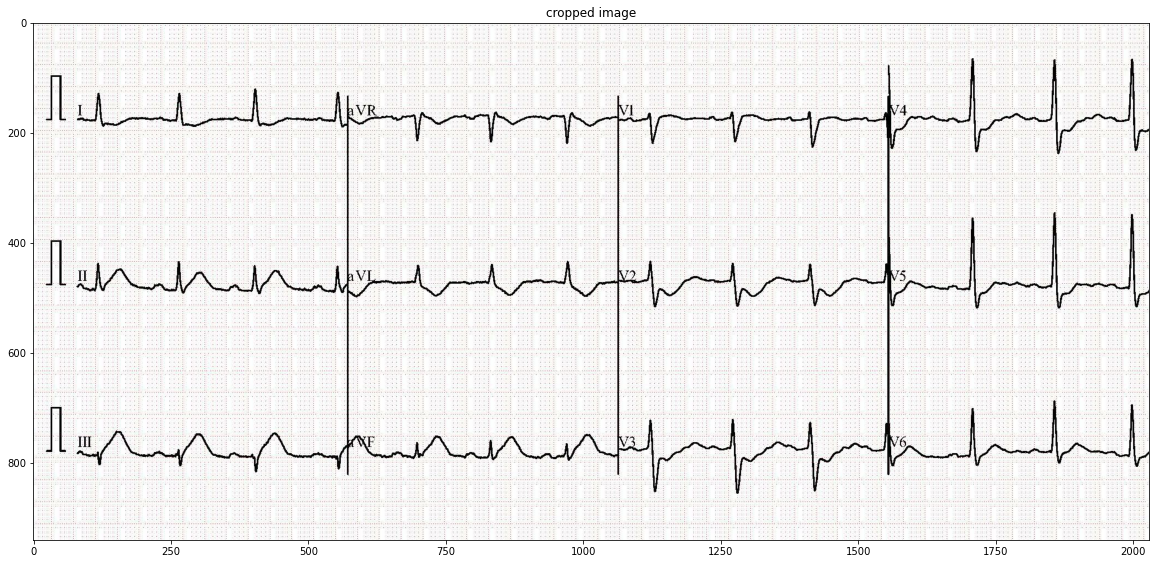

In [17]:
plt.figure(figsize=(20,10))
x = plt.imread('F:\leads_dataset\lead_1.jpg')
plt.imshow(x)
plt.title("cropped image")

#### Extracting the 12 leads from the ECG Signal Images already cropped

In [19]:
def im_crop_12leads_I(image, width= 315, height= 315):
    I_img   = image.crop((120.5, 0.5, width + 120.5 , 0.5 + height)).convert('L')  
    return I_img 

def im_crop_12leads_II(image, width= 315, height= 315):
    II_img  = image.crop((120.5, 315.5, width + 120.5 , 315.5+ height)).convert('L')
    return II_img

def im_crop_12leads_III(image, width= 315, height= 315): 
    III_img = image.crop((120.5, 630.5, width + 120.5 , 630.5+ height)).convert('L')
    return III_img

def im_crop_12leads_V1_img(image, width= 315, height= 315):
    V1_img  = image.crop((1133.5, 0.5, width + 1133.5 , 0.5+ height)).convert('L')
    return V1_img

def im_crop_12leads_V2_img(image, width= 315, height= 315):  
    V2_img  = image.crop((1133.5, 315.5, width + 1133.5 , 315.5+ height)).convert('L')
    return V2_img

def im_crop_12leads_V3_img(image, width= 315, height= 315):
    V3_img  = image.crop((1133.5, 630.5, width + 1133.5 , 630.5+ height)).convert('L')
    return V3_img

def im_crop_12leads_V4_img(image, width= 315, height= 315):
    V4_img  = image.crop((1639.5, 0.5, width + 1639.5 , 0.5 + height)).convert('L')
    return V4_img

def im_crop_12leads_V5_img(image, width= 315, height= 315):
    V5_img  = image.crop((1639.5, 0.5, width + 1639.5 , 0.5+ height)).convert('L')
    return V5_img

def im_crop_12leads_V6_img(image, width= 315, height= 315):
    V6_img  = image.crop((1639.5, 630.5, width + 1639.5 , 630.5+ height)).convert('L')
    return V6_img

def im_crop_12leads_aVR_img(image, width= 315, height= 315): 
    aVR_img = image.crop((672.5, 0.5, width + 672.5 , 0.5 + height)).convert('L')
    return  aVR_img

def im_crop_12leads_aVL_img(image, width= 315, height= 315): 
    aVL_img = image.crop((672.5, 315.5, width + 672.5 , 315.5+ height)).convert('L')
    return aVL_img

def im_crop_12leads_aVF_img(image, width= 315, height= 315): 
    aVF_img = image.crop((672.5, 630.5, width + 672.5 , 630.5+ height)).convert('L')
    return aVF_img

#### Appending of images data and their corresponding labels

In [20]:
image_no=1
lead_I=[]
label_lead_I=[]
lead_II=[]
label_lead_II=[]
lead_III=[]
label_lead_III=[]
lead_V1=[]
label_lead_V1=[]
lead_V2=[]
label_lead_V2=[]
lead_V3=[]
label_lead_V3=[]
lead_V4=[]
label_lead_V4=[]
lead_V5=[]
label_lead_V5=[]
lead_V6=[]
label_lead_V6=[]
lead_aVR=[]
label_lead_aVR=[]
lead_aVL=[]
label_lead_aVL=[]
lead_aVF=[]
label_lead_aVF=[]

for i in range (len(arr)):
    im = Image.open('F:\leads_dataset\lead_' + str(image_no) + '.jpg')
    ############
    lead_I.append(im_crop_12leads_I(im, width= 315, height= 315))
    label_lead_I.append(ECG_label[i])
    lead_II.append(im_crop_12leads_II(im, width= 315, height= 315))
    label_lead_II.append(ECG_label[i])
    lead_III.append(im_crop_12leads_III(im, width= 315, height= 315))
    label_lead_III.append(ECG_label[i])
    lead_V1.append(im_crop_12leads_V1_img(im, width= 315, height= 315)) 
    label_lead_V1.append(ECG_label[i])
    lead_V2.append(im_crop_12leads_V2_img(im, width= 315, height= 315))
    label_lead_V2.append(ECG_label[i])
    lead_V3.append(im_crop_12leads_V3_img(im, width= 315, height= 315))
    label_lead_V3.append(ECG_label[i])
    lead_V4.append(im_crop_12leads_V4_img(im, width= 315, height= 315))
    label_lead_V4.append(ECG_label[i])
    lead_V5.append(im_crop_12leads_V5_img(im, width= 315, height= 315))
    label_lead_V5.append(ECG_label[i])
    lead_V6.append(im_crop_12leads_V6_img(im, width= 315, height= 315))
    label_lead_V6.append(ECG_label[i])
    lead_aVR.append(im_crop_12leads_aVR_img(im, width= 315, height= 315))
    label_lead_aVR.append(ECG_label[i])
    lead_aVL.append(im_crop_12leads_aVL_img(im, width= 315, height= 315))
    label_lead_aVL.append(ECG_label[i])
    lead_aVF.append(im_crop_12leads_aVF_img(im, width= 315, height= 315))
    label_lead_aVF.append(ECG_label[i])
    image_no += 1
#######################################
label_lead_I= pd.Series(label_lead_I)    
label_lead_II= pd.Series(label_lead_II)
label_lead_III= pd.Series(label_lead_III)
label_lead_V1= pd.Series(label_lead_V1)
label_lead_V2= pd.Series(label_lead_V2)
label_lead_V3= pd.Series(label_lead_V3)
label_lead_V4= pd.Series(label_lead_V4)
label_lead_V5= pd.Series(label_lead_V5)
label_lead_V6= pd.Series(label_lead_V6)
label_lead_aVR= pd.Series(label_lead_aVR)
label_lead_aVL= pd.Series(label_lead_aVL)
label_lead_aVF= pd.Series(label_lead_aVF)

ECG_labels = pd.concat([label_lead_I,label_lead_II,label_lead_III,label_lead_V1, label_lead_V2,label_lead_V3,label_lead_V4,label_lead_V5,label_lead_V6,label_lead_aVR,label_lead_aVL,label_lead_aVF],ignore_index=True)

#### Saving data to a local driver

In [21]:
image_no = 1
for i in range (len(arr)):
    lead_I[i].save('F:\concatenation\lead_' + str(image_no) + '.jpg', 'JPEG')
    lead_II[i].save('F:\concatenation\lead_' + str(image_no+1) + '.jpg', 'JPEG')
    lead_III[i].save('F:\concatenation\lead_'+ str(image_no +2) + '.jpg', 'JPEG')
    lead_V1[i].save('F:\concatenation\lead_' + str(image_no + 3) + '.jpg', 'JPEG')
    lead_V2[i].save('F:\concatenation\lead_' + str(image_no + 4) + '.jpg', 'JPEG')
    lead_V3[i].save('F:\concatenation\lead_' + str(image_no + 5) + '.jpg', 'JPEG')
    lead_V4[i].save('F:\concatenation\lead_' + str(image_no + 6) + '.jpg', 'JPEG')
    lead_V5[i].save('F:\concatenation\lead_' + str(image_no + 7) + '.jpg', 'JPEG')
    lead_V6[i].save('F:\concatenation\lead_' + str(image_no + 8) + '.jpg', 'JPEG')
    lead_aVR[i].save('F:\concatenation\lead_' + str(image_no + 9) + '.jpg', 'JPEG')
    lead_aVL[i].save('F:\concatenation\lead_' + str(image_no + 10) + '.jpg', 'JPEG')
    lead_aVF[i].save('F:\concatenation\lead_' + str(image_no + 11) + '.jpg', 'JPEG')
    image_no += 12

#### Extraction and removing of  the ECG images background 

Text(0.5, 1.0, 'Image without background')

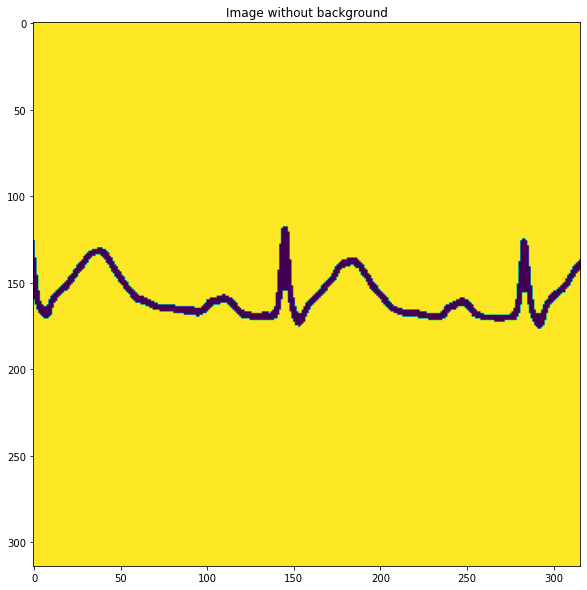

In [23]:
im_remover=[]
for s in range (len(arr)*12): 
    img= cv2.imread('F:\concatenation\lead_' + str(s+1) +'.jpg') 
    def salt(img, n):
        for k in range(n):
            i = int(np.random.random() * img.shape[1])
            j = int(np.random.random() * img.shape[0])
            if img.ndim == 2:
                img[j,i] = 255
            elif img.ndim == 3:
                img[j,i,0]= 255
                img[j,i,1]= 255
                img[j,i,2]= 255
            return img
    result = salt(img, 10)
    median = cv2.medianBlur(result,5)
    gray = cv2.cvtColor(median, cv2.COLOR_BGR2GRAY)  
    (thresh, blackAndWhiteImage) = cv2.threshold(gray, 85, 255, cv2.THRESH_BINARY)
    im_remover.append(blackAndWhiteImage)

plt.figure(figsize=(20,10))
plt.imshow(im_remover[1]) 
plt.title("Image without background") 

Next: 
    1- Automating crooping procedure of ECG images
    2- Applying CNN model to preprocessed data 